# ch 1. simple linear regression

선형 회귀(linear regression)는 종속 변수 y와 한개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀 분석 기법입니다. 종속 변수 하나와 독립 변수 하나 사이의 관계를 규명할 경우엔 단순 선형 회귀, 여러 독립 변수와 종속 변수 사이의 관계를 규명하면 다중 선형 회귀라고 합니다. 이번 챕터에서는 단순 선형 회귀의 개념과 실습을 진행해보겠습니다.

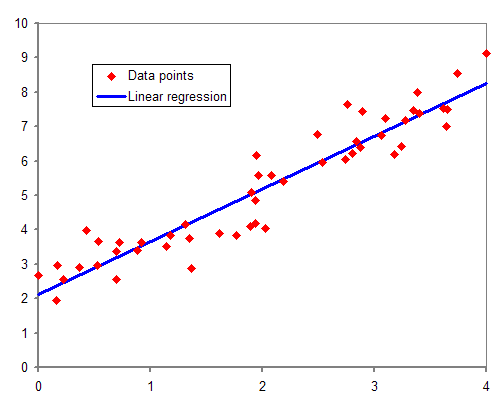

## 단순 선형 회귀

단순 선형 회귀는 하나의 독립 변수가 종속 변수에 직선의 방정식으로 표현될 수 있는 모형으로 수식은 아래와 같습니다.

$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

$$X:\text{독립 변수}$$
$$Y:\text{종속 변수}$$
$$\beta_{0}:\text{절편}$$
$$\beta_{1}:\text{기울기}$$
$$\epsilon:\text{오차}$$

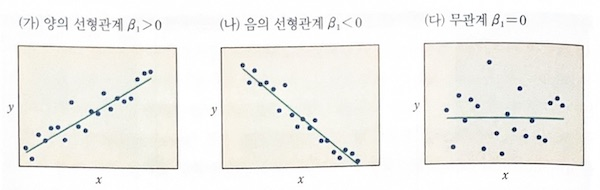

기울기가 양수이면 독립 변수와 종속 변수가 양의 상관관계를 갖고, 음수면 음의 상관관계를 갖습니다. 0이면 독립 변수와 종속 변수 사이 관계가 없습니다.

## 최소 제곱법

우리가 하고 싶은 것은 데이터로부터 회귀 식을 추정하는 것입니다. 추정된 회귀 식은 아래와 같습니다.

$$\hat{y}=b_{0}+b_{1}x$$

오차의 제곱이 최소가 되는 값을 찾으면 β0, β1에 대한 가장 그럴듯한 추정값을 구할 수 있지 않을까요? 이를 식으로 나타내면 아래와 같습니다. (b0와 b1을 각각 β0, β1의 추정값입니다.)

$$(b_{0},b_{1})=argmin\sum_{i=1}^{n}\epsilon_{i}^2=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}x_{i})^2$$

오차의 제곱을 최소로 만드는 기법이라고 하여 최소 제곱법이라고 부릅니다. 최소 제곱법을 이용하여 유도한 추정 값들은 아래와 같습니다. 

유도 과정이 궁금하신 분들은 아래 링크를 참고해주세요.  
https://evening-ds.tistory.com/36

$$b_{1}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}=r_{xy}\frac{S_{y}}{S_{x}}$$

$$b_{0}=\bar{y}-b_{1}\bar{x}$$

## 집 값 예측하기 예제

데이터 셋 링크: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

### 독립 변수 선택

price와 피어슨 상관계수가 가장 높은 변수 하나를 독립 변수로 선택하겠습니다.

### statsmodels를 이용한 선형 회귀 모델 학습

선형 상관관계가 가장 큰 변수들 중 sqft_living을 선택하여 선형 회귀 모델을 학습시켜 보겠습니다. 먼저 scatter plot 부터 그려보겠습니다.

python statsmodels 이용하여 단순 선형 회귀 모델을 도출해보겠습니다.  statsmodels를 이용하여 선형회귀 모델을 학습시킬 경우, 상수항을 추가해주어야 합니다.  

이제 최소 제곱법의 구현체 중 하나인 OLS를 이용해서 선형회귀 모델을 학습시켜 보겠습니다. OLS에 대한 자세한 내용이 궁금하신 분들은 아래 강의를 참고해주세요.

https://www.youtube.com/watch?v=eTTGN4FAPxk

학습한 회귀식을 시각화 해보겠습니다.

### 테스트 데이터 셋에 대해 적용

train set으로 회귀 식을 도출했으니, 이제 test set에 적용해보겠습니다. 그리고 회귀 식이 얼마나 잘 test set을 설명하는지 정량적인 지표를 측정해보겠습니다.

### 결과 해석

위에서 R2, RMSE 두 가지 척도로 회귀식의 적합도를 측정하였습니다. 이는 각각 데이터의 전체 변동에서 회귀식이 설명하는 비중, 회귀식의 오차항의 제곱합의 제곱근을 의미하며, 자세한 내용은 이어지는 챕터들에서 배울 예정입니다. 이 외에도 statsmodels는 회귀식이 데이터를 얼마나 잘 설명하는 지 측정하는 여러가지 지표들을 제공해줍니다.

굉장히 많은 숫자가 겁을 주지만 전혀 걱정할 필요 없습니다. 이어지는 챕터들에서 모두 다룰 내용들입니다. 지금은 그냥 회귀식이 얼마나 적합한지 측정하는 지표가 많이 있다 정도로 알고 넘어가겠습니다.

## 선형 회귀 모형의 가정사항

선형 회귀 모델은 전제하는 가정사항들이 있습니다. 먼저 하나의 관측값은 회귀식을 통해 추정한 값과 오차의 합으로 계산할 수 있습니다.

$$Y_{i}=\beta_{0}+\beta_{1}X_{i}+\epsilon_{i}$$

여기서 오차항은 회귀식을 통해 추청한 값과 실제 값 사이의 차이를 의미합니다. 이 오차항에 대해서 몇 가지 가정을 전제하고 모델을 구성한 것이 선형 회귀 모델입니다.

$$ \text{1. 오차항(}\epsilon_{i}\text{)의 평균은 0이고 분산은 }\sigma^2 \text{이다. (등분산성)}$$

$$\text{2. 오차항(}\epsilon_{i}\text{들은 서로 독립이다. (독립성)}$$

$$\text{3. 오차항}\epsilon_{i}\text{은 정규분포를 따른다. (정규성)}$$

위 세 가지 가정을 모두 합쳐서 수식으로 표기하면 아래와 같습니다.

$$\epsilon_{i} \sim iid\;N(0, \sigma^2)$$

해석해보면, 각각의 오차항들은 서로 독립적인 정규 분포를 따른다고 가정하는 것입니다. 이를 그림으로 그려보면 아래와 같습니다.

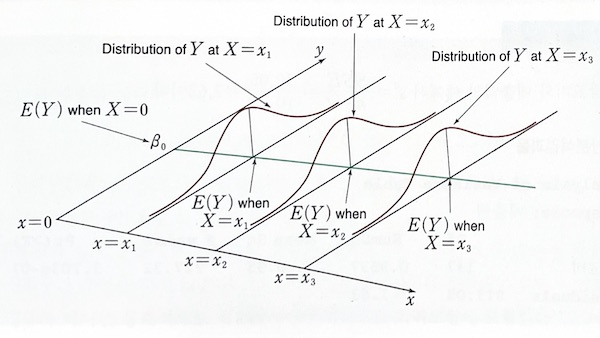

선형 회귀식을 구하는 방법으로 최소 제곱법 이외에도 많은 방법들이 존재합니다. 그런데 이런 방법들은 위 가정 사항들을 전제하고 회귀식을 구한 것입니다. 따라서 도출된 회귀식이 적합한지 검정하기 위해서는 가정 사항들이 만족되는 지를 점검해야합니다.

예제 마지막에서 살펴본 지표들에는 이런 가정이 얼마나 만족되었는 지를 측정한 결과도 있습니다. 회귀 분석을 할 경우, 단순히 모델이 얼마나 잘 예측하는 지 보다 도출된 회귀식이 얼마나 데이터를 잘 설명하는 지를 해석하는 부분이 더 중요합니다. (예측력만 놓고 따지면 다른 기법들이 훨씬 우수합니다. ex. decision tree, deep learning) 

## 정리

이번 챕터에서는 독립 변수가 1개, 종속 변수가 1개일 때 적용할 수 있는 단순 선형 회귀에 대해서 알아보았습니다. statsmodels 라이브러리를 사용해서 선형 회귀 모델을 직접 학습시켜 보았고, 결과 요약 리포트를 뽑아보았습니다. 마지막으로 선형 회귀 모델의 가정 사항에 대해서 알아보았습니다. 특히 가정 사항을 잘 이해하는 것이 이어지는 챕터들을 따라올 때 유용하므로 복습을 잘 해두시기 바랍니다.